![forestfire_1280p.jpg](https://i.imgur.com/O268I6T.jpg)

## Context

In the light of the recent startling events of the wildfires in the Amazon, I decided to run a **short descriptive analysis for Brazil fires** in the last ~ 20 years. Media gave me some curiosities and questions that I wanted to check with real data and unbiased mindset.

The dataset I worked on has data starting 1998 to 2017, on months, for every state in Brazil

# I. Data Imports
First, importing and preparing the data

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Import
data = pd.read_csv('../input/forest-fires-in-brazil/amazon.csv', encoding='latin1')
data.head(5)

There are 6454 variables, with the first registration being in 1998, and the last in 2017.

In [ ]:
statistics = data['number'].describe().reset_index()

statistics.style.format({"number": "{:20,.0f}"}).hide_index().highlight_max(color='#FFB27A')

In [ ]:
# Recode months into english
data['month'].replace(to_replace = 'Janeiro', value = 'Jan', inplace = True)
data['month'].replace(to_replace = 'Fevereiro', value = 'Feb', inplace = True)
data['month'].replace(to_replace = 'Março', value = 'Mar', inplace = True)
data['month'].replace(to_replace = 'Abril', value = 'Apr', inplace = True)
data['month'].replace(to_replace = 'Maio', value = 'May', inplace = True)
data['month'].replace(to_replace = 'Junho', value = 'Jun', inplace = True)
data['month'].replace(to_replace = 'Julho', value = 'Jul', inplace = True)
data['month'].replace(to_replace = 'Agosto', value = 'Aug', inplace = True)
data['month'].replace(to_replace = 'Setembro', value = 'Sep', inplace = True)
data['month'].replace(to_replace = 'Outubro', value = 'Oct', inplace = True)
data['month'].replace(to_replace = 'Novembro', value = 'Nov', inplace = True)
data['month'].replace(to_replace = 'Dezembro', value = 'Dec', inplace = True)

In [ ]:
# Group data by year, state, month
year_mo_state = data.groupby(by = ['year','state', 'month']).sum().reset_index()

year_mo_state.head()

# II. Visuals and understanding
Now, let's start building some visuals :)

Fires **increased dramatically** in the last 20 years, from 20,000 in 1998 to almost **double in 2017**. What's also alarming is that there is also an increasing trend in the data, so **we can expect even more** wildfires in the years to follow.

2003 and 2016 had the most wildfires throughout Brazil.

In [ ]:
# Set up the defaults
sns.set_style('whitegrid')
from matplotlib.pyplot import MaxNLocator, FuncFormatter

plt.figure(figsize=(16,9))

# Make the plot
ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state, estimator = 'sum', color = '#FF5555', 
                  lw = 3.5, err_style = None , alpha = 0.85)
# Create a line
import pylab as p
p.arrow( 1998, 25000, 19, 15000, facecolor="#FFB27A", edgecolor="#FFB27A", head_width=0, head_length=0, length_includes_head = False,
       width = 0.15, alpha = 0.7, shape = "full")

# Make pretty
plt.title('Total Fires in Brazil : 1998 - 2017', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

View by months doesn't bring anything unexpected. There are many more fires occuring in the second half of the year than the first one, especially in the late summer to beginning of autumn.

In [ ]:
# Figure size
plt.figure(figsize=(16,12))

# The plot
sns.boxplot(x = 'month', order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'], 
            y = 'number', data = year_mo_state, palette = "coolwarm", saturation = 1, width = 0.9, fliersize=4, linewidth=2)

# Make pretty
plt.title('Fires in Brazil by Month', fontsize = 25)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

### The Amazon State
After this, I wanted to check **especially the Amazon State**, as it is the most discussed in the media.

I can say I was surprised of the results: Distribution throughout the years for Amazon looks more like a **random walk**, with many high and low peaks, but with no increasing trend whatsoever.

In [ ]:
# First create the data
year_mo_state_Amazon = data[data['state'] == 'Amazonas'].groupby(by = ['year','state', 'month']).sum().reset_index()

# Set up the figure size
plt.figure(figsize=(16,9))

# CReate the plot
ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state_Amazon, estimator = 'sum', color = '#FF2323', lw = 3.5, 
                  err_style = None, alpha = 0.85)

# Add line
p.arrow( 1998, 1500, 19, 0, facecolor="#FFB27A", edgecolor="#FFB27A", head_width=0, head_length=0, length_includes_head = False,
       width = 20, alpha = 0.7, shape = "full")

# Make pretty
plt.title('Total Fires in Amazon : 1998 - 2017', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

But, if we look more closely to the dataset, Amazon State **isn't by far the place where most of the fires in Brazil occure**.

Top 3 states are:
1. **Mato Grosso** (an outlier, with a total sum of wildfires in the analysed period of 96k)
2. **Paraiba** (52k)
3. **Sao Paulo** (51k)
...
4. **Amazon** has the 10th place in this ranking.

*Update: As somebody wise said in the comments, the Amazon forest spread on multiple states, not only the Amazonian State. :)*

In [ ]:
# Creating the top 10 dataframe
states_fires = data.groupby(by = 'state')['number'].sum().sort_values(ascending = False).head(10).reset_index()
states_fires = states_fires.sort_values(by = 'number', ascending = True)

states_fires

In [ ]:
# Set figure size
plt.figure(figsize = (16, 9))

# plot
ax = sns.barplot(x = states_fires['state'], y = states_fires['number'], palette = "Reds", alpha = 0.85)

# Make pretty
plt.title("Top 10 most affected states", fontsize = 25)
plt.xlabel("State", fontsize = 20)
plt.ylabel("Sum of Wildfires", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

* I will also drop a map of Brazil here, just for you to refference if you are not familiar with their geography.

### States in Brazil
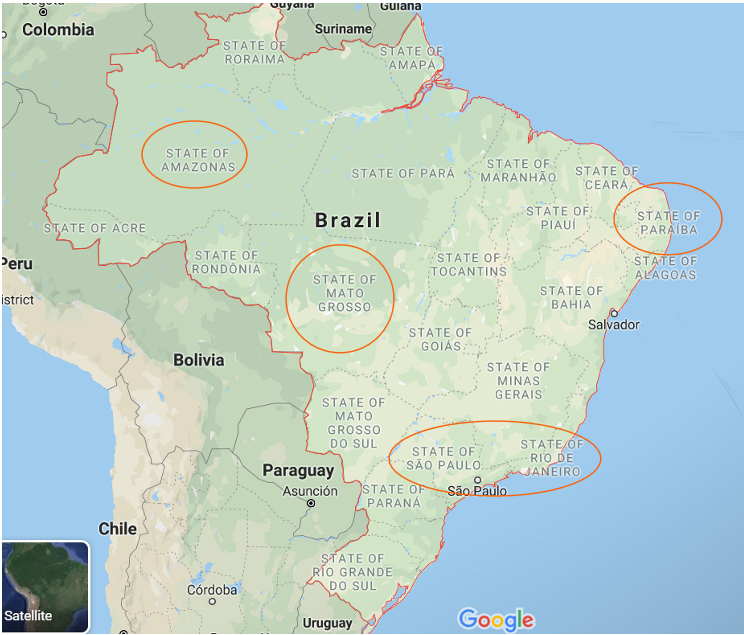


### Amazonian Rainforest spread
![Amazon](https://i.imgur.com/uc9oGxP.jpg)


In the graph below you can see how far Mato Grosso is from the other states in terms of wildfires. It looks like it is also the only one increasing, while the others have a ~ "white noise" distribution, like we saw for Amazon.

In [ ]:
# Prepare the data
year_mo_state_top_states = data[data['state'].isin(['Amazonas','Mato Grosso','Paraiba','Sao Paulo','Rio'])].groupby(by = ['year','state', 'month']).sum().reset_index()

# The plot
plt.figure(figsize=(16,9))
ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state_top_states, hue = 'state', estimator = 'sum', lw = 3.5, 
                  err_style = None, palette = ["#FF2323", "#FFA653", "#FF6E6E", "#FF8411", "#FFDA11"])

# Make pretty
plt.title('Total Fires in Amazon : 1998 - 2017', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# III. Some additional information for the curious

### Mato Grosso

Mato Grosso is Brazil’s third largest state. This state has a small weight of people from total population of Brazil, about 1.5%, but a very strong agricultural industry.

In the past, the state of Mato Grosso has been one of Brazil’s largest emitters of CO², due to forest fires and deforestation, driven by its strong agriculture based economy.

However, they reduced the massive deforestation starting 2004. 
For more info on the matter, here's a link you may find interesting: [link here](http://financingsustainablelandscapes.org/pilot-projects/agriculture-tackle-deforestation-mato-grosso-brazil)


### End Note:
As an end note, it's always good to be more *mindful of the environment*. It doesn't require big efforts, just a pinch of added attention when you buy something *(look on the label and ask yourself: is it recyclable? is it made sustainably? is it harming the environment?)*. You can also start turning off the the water more, or keep the lights on only in the room you stay in. Be more minimalist (do you really need that? :) ).

Hey, it's duable! :) *Be better!*

Cheers


<div class="alert alert-block alert-info">
<p><p>
<p>If you liked this, don't be shy, upvote! 😁<p>
<b>Cheers!<b>
<p><p>
</div>